In [54]:
import acquire as a
import prepare as p 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = a.get_activity()

In [3]:
df = p.prep_activity(df)

In [4]:
df.head()

,total_burned,steps,distance,floors,out,fat_burn,cardio,peak,active_burned,bmr,time,stride,height,min_age,max_age,min_weight,max_weight
date,,,,,,,,,,,,,,,,,
2018-09-27,3348,9751,4.60,7,849,167,10,42,1427,1921,1068,2.490821,6.001979,27,32,196.852823,201.541754
2018-09-28,2970,4531,2.14,4,775,235,0,0,1068,1902,1010,2.493754,6.009046,27,32,193.726869,198.415800
2018-09-29,3043,7043,3.32,5,788,218,4,5,1220,1823,1015,2.488939,5.997444,27,32,180.729483,185.418413
2018-09-30,4184,15991,7.54,9,652,254,45,72,2504,1680,1023,2.489600,5.999037,27,32,157.202568,161.891499
2018-10-01,3180,8307,3.92,8,813,201,5,24,1330,1850,1043,2.491585,6.003820,27,32,185.171628,189.860558


# Data Dictionary:


steps - number of steps taken, tracked by a 3-axis accelerometer, worn on the wrist. This sensor tracks the frequency, duration, intensity, and patterns of your movement. Numbers can appear artificially lower, if walking with arms still, such as pushing a stroller. Numbers can appear artificially higher, if sensor is jarred during inactivity, such as riding down a bumpy road.

distance – distance in miles traveled that day, calculated by multiplying steps and stride length. Stride length is a constant value determined by an individual’s height and weight. If an activity is tracked distance is calculated using GPS.

floors – floors traveled measured by an altimeter, which is a sensor that calculates altitude based on atmospheric pressure. The device is designed to detect pressure changes based on elevation gain, but other types of pressure changes, such as a gust of wind, a weather change, or opening a door, can occasionally cause your device to register extra floors.

zones – fitbit tracks the heartrate of the subject and records the amount of time the subject spends in defined fitness zones. These zones seem to correspond to the activity features presented in the date the have been renamed: out, fat_burn, cardio, and peak for brevity.  Each zone is described below in greater dertail.

“out of zone” – time, in minutes, spent in in “out of zone” below 50% of max heart rate. not considered exercise.

“fat burn zone” –  time, in minutes, spent in “fat burn zone” between 50 and 69% of max heart rate. Low to medium intensity workout.

“cardio zone” – time, in minutes, spent in “cardio zone” between 70 and 84% of max heart rate. Medium to high intensity workout. 

“peak zone” – time, in minutes, spent in “peak zone” greater than 85% of max heart rate. Intended for short durations of intense exercise. 

active_burned – number of calories fit bit estimates the subject had burned during exercise. Exact method of calculation is unknown.

total_burned – total number of calories burned during that day. Calculated using basal metabolic rate (the rate at which the subject burns calories at rest) and your activity data to estimate your calories burned. heart-rate data is also included, especially to estimate calories burned during exercise. 

BMR – number of calories burned that are not the result of activity. calculated by subtracting active_burn from total_burned
Time – total time, in minuets, that fitbit was recording. Calculated using the total of out, fat_burn, cardio, and peak columns.

Time – total time, in minuets, that fitbit has recorded. Calculated using the total of out, fat_burn, cardio, and peak columns.

Stride – The length the subject travels in one step, represented in feet. This is calculated by dividing distance (converted to feet) by steps.

min_age – Lowest age that produced a reasonable weight when calculated using the revised Harris-Benedict equation for Basal Metabolic Rate (BMR). Value is in years.

max_age – We chose to limit the scope of this part of the investigation to five years greater than the minimum age. Value is in years.

min_weight – approximate minimum weight of subject calculated using the revised Harris-Benedict equation for Basal Metabolic Rate (BMR). Value is in pounds.

max_weight - approximate maximum weight of subject calculated using the revised Harris-Benedict equation for Basal Metabolic Rate (BMR). Value is in pounds.

### Appendix
The Revised Harris-Benedict Equation calculates BRM using the following formula for men:

BMR = 88.362 + (13.397 x weight in kg) + (4.799 x height in cm) - (5.677 x age in years)

Applications of this formula round decimal values to the nearest whole number. 

Fitbit calculates heartrate by emitting a green rapidly flashing light and using light sensitive photodiodes to measure the change in light that is caused by capillaries in your arm expanding and contracting as your heart beats.

In [5]:
df.describe()

,total_burned,steps,distance,floors,out,fat_burn,cardio,peak,active_burned,bmr,time,stride,height,min_age,max_age,min_weight,max_weight
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,213.000000,213.000000,225.0,225.0,225.000000,225.000000
mean,3401.911111,8536.186667,4.046800,12.591111,809.520000,188.235556,14.920000,33.871111,1484.546667,1917.364444,1046.546667,2.498020,6.019324,27.0,32.0,196.254687,200.943618
std,632.426578,5255.746608,2.506253,25.844174,243.232639,75.170001,15.363535,37.195986,747.795790,192.377351,187.948200,0.047642,0.114800,0.0,0.0,31.650668,31.650668
min,799.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,748.000000,41.000000,2.329412,5.613040,27.0,32.0,3.866311,8.555242
25%,3069.000000,4714.000000,2.220000,2.000000,654.000000,158.000000,3.000000,2.000000,1062.000000,1792.000000,940.000000,2.488568,5.996549,27.0,32.0,175.629243,180.318173
50%,3385.000000,7806.000000,3.680000,7.000000,750.000000,203.000000,11.000000,15.000000,1481.000000,1923.000000,996.000000,2.490181,6.000437,27.0,32.0,197.181871,201.870801
75%,3765.000000,12380.000000,5.900000,13.000000,877.000000,236.000000,21.000000,63.000000,1962.000000,2055.000000,1076.000000,2.492501,6.006026,27.0,32.0,218.899023,223.587954
max,5199.000000,25512.000000,12.000000,195.000000,1440.000000,349.000000,78.000000,154.000000,3596.000000,2291.000000,1440.000000,2.856740,6.883710,27.0,32.0,257.726659,262.415590


# Lable Swap

It is recommended that healthy adults get at least 150 minutes of moderate aerobic activity or 75 minutes of vigorous aerobic activity per day. This comes to roughly 21 minutes of moderate activity per day or 11 minutes of vigorous activity per day.

Based on this we would expect that the subject's cardio time to exceed his peak time.

However, the subject's mean peak time is 34 minuts and his mean cardio time is only 15 minuts.

Additionally according to the fitbit website the “cardio zone” should be the target zone for most people for a majority of thier exercise. The “peak zone” is intended for intence workouts over a short duration.

Looking as the plot of the two columns in the subsequent graph one can see that these roles seem to be reversed.

For these reasons, and the fact that the man in the white coat, mentioned that he may have mixed up the labels we believe that the cardio and peak columns have been swapped with one another.

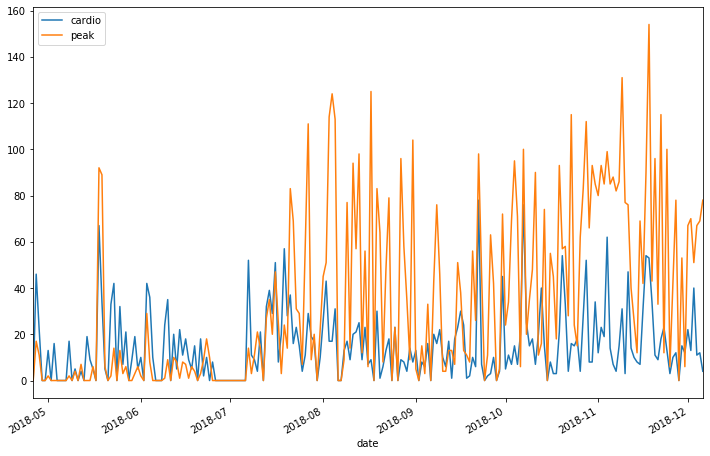

In [38]:
df[['cardio', 'peak']].plot.line(figsize=(12,8))

# Gender

The average daily number of calories burned by gender is:

1600-2400 for females 

2000-3000 for males

The main determining factor of the number of calories individual burns within each gender is activity. The more activity a person has the higher the number of calories they will burn.

The subject wearing the fitbit has a mean calories burned of 2145 on the days when it was “out of zone” all day.

Comparing this number calories burned with the range of average calories burned by male and female humans, we can infer that the subject is either a male with low activity or a female with moderate activity. 

Because this data was taken while the subject was “out of zone” for the full day we can conclude that the subject is likely to be male.

In [7]:
#Attempting to determine total calories burned at rest by looking only at the columns where "out of zone" is the only feature with a non zero value
df1 = df[(df.out > 0) & (df.fat_burn==0) & (df.cardio==0) & (df.peak==0)]
df1

,total_burned,steps,distance,floors,out,fat_burn,cardio,peak,active_burned,bmr,time,stride,height,min_age,max_age,min_weight,max_weight
date,,,,,,,,,,,,,,,,,
2018-06-27,2145,0,0.0,0,1440,0,0,0,0,2145,1440,NaN,NaN,27,32,233.706172,238.395103
2018-06-28,2145,0,0.0,0,1440,0,0,0,0,2145,1440,NaN,NaN,27,32,233.706172,238.395103
2018-06-30,2145,0,0.0,0,1440,0,0,0,0,2145,1440,NaN,NaN,27,32,233.706172,238.395103
2018-07-03,2144,0,0.0,0,1440,0,0,0,0,2144,1440,NaN,NaN,27,32,233.541649,238.230579
2018-07-06,2144,0,0.0,0,1440,0,0,0,0,2144,1440,NaN,NaN,27,32,233.541649,238.230579
2018-06-06,2145,0,0.0,0,1440,0,0,0,0,2145,1440,NaN,NaN,27,32,233.706172,238.395103
2018-06-07,2146,0,0.0,0,1440,0,0,0,0,2146,1440,NaN,NaN,27,32,233.870696,238.559627
2018-06-11,2146,0,0.0,0,1440,0,0,0,0,2146,1440,NaN,NaN,27,32,233.870696,238.559627
2018-06-26,2144,0,0.0,0,1440,0,0,0,0,2144,1440,NaN,NaN,27,32,233.541649,238.230579


In [8]:
# Get mean of total calories burned in a day while subject was in 'out of zone' all day
df1.total_burned.mean()

2144.8888888888887

# Hight

Fitbit calculates a subjects distance by multiplying their steps by their stride distance as follows:

Number of steps * stride  = distance

Stride can be computed using the following formula:

Stride = height * (.415) for men

Because we know the subjects number of steps and the resulting distance we are able to calculate the subjects likely stride length. Using the stride length we are then able to calculate theb subject’s likely height.

8536(mean number of steps) * stride(ft) = 21120(mean distance(ft))

stride(ft) = 2.5

2.5 = hight(ft) * .415

hight(ft) = 6

# Weight Change

Looking at our maximum calculated max weight and subtracting the 

If we subtract the subject’s max_weight found at the 25th percentile from the subjects maximum max_weight we can approximate a weight loss of about 82.

262 – 180 = 82

The same is true is true if we use min_weight.

If we plot the subject’s max_weight and min_weight by month we can see the same trend.

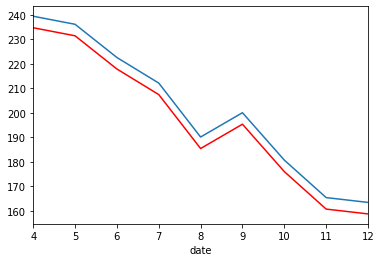

In [33]:
df.groupby(df.index.month).min_weight.mean().plot.line(color='red')
df.groupby(df.index.month).max_weight.mean().plot.line()

# Exploration: looking at features over time

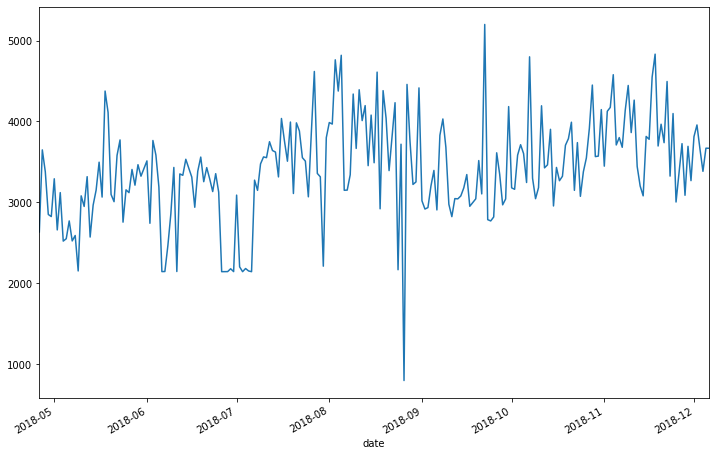

In [37]:
df.total_burned.plot.line(figsize=(12,8))

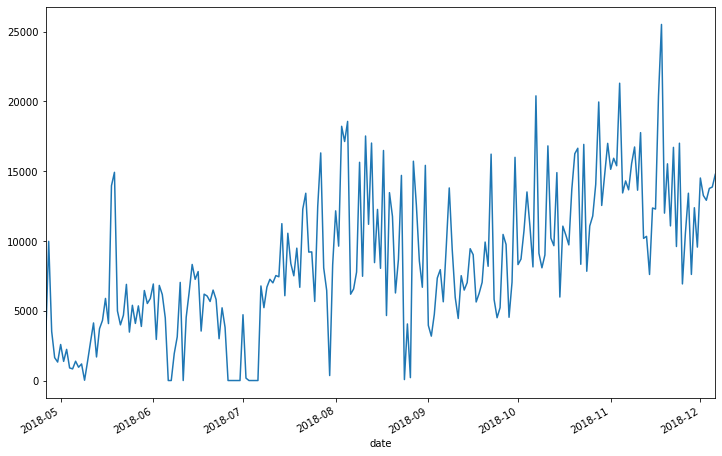

In [39]:
df.steps.plot.line(figsize=(12,8))

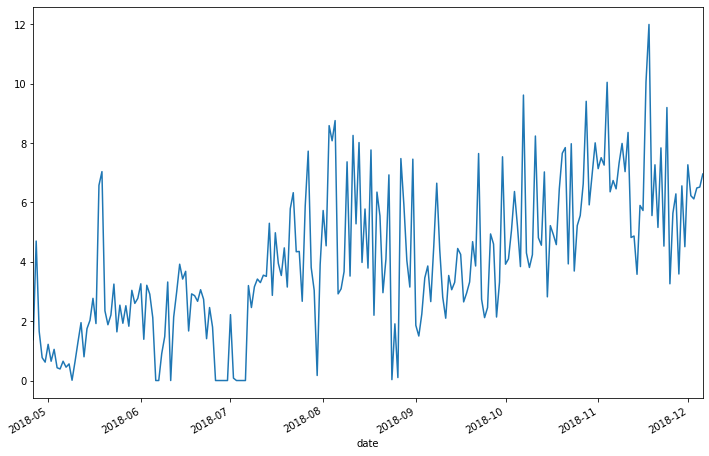

In [41]:
df.distance.plot.line(figsize=(12,8))

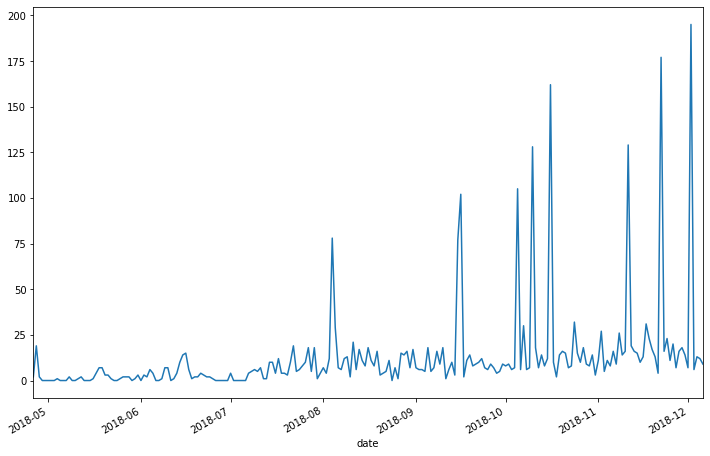

In [42]:
df.floors.plot.line(figsize=(12,8))

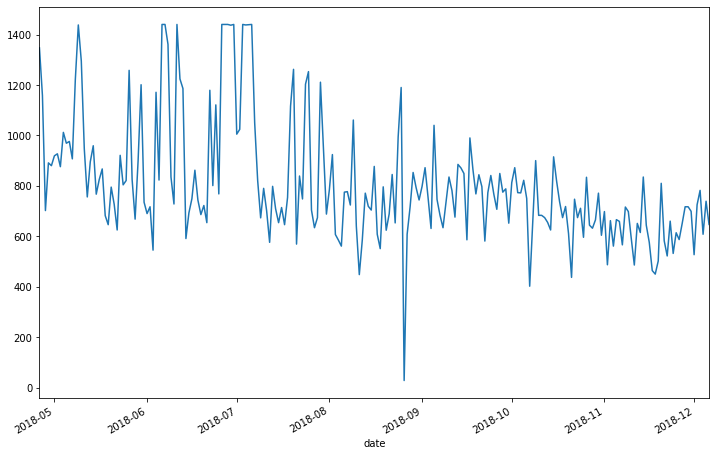

In [43]:
df.out.plot.line(figsize=(12,8))

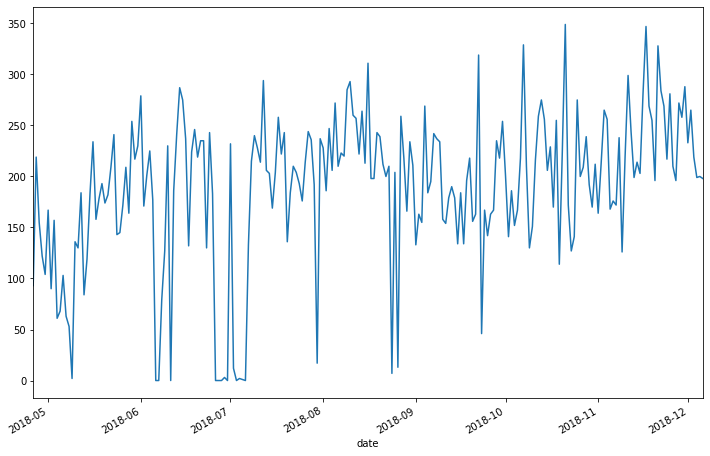

In [44]:
df.fat_burn.plot.line(figsize=(12,8))

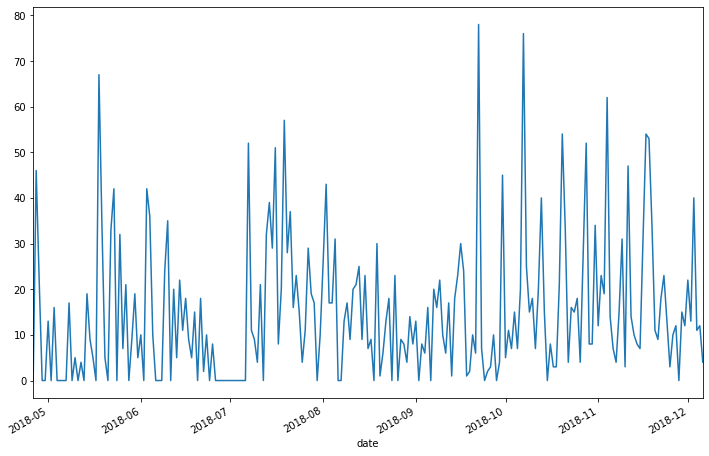

In [45]:
df.cardio.plot.line(figsize=(12,8))

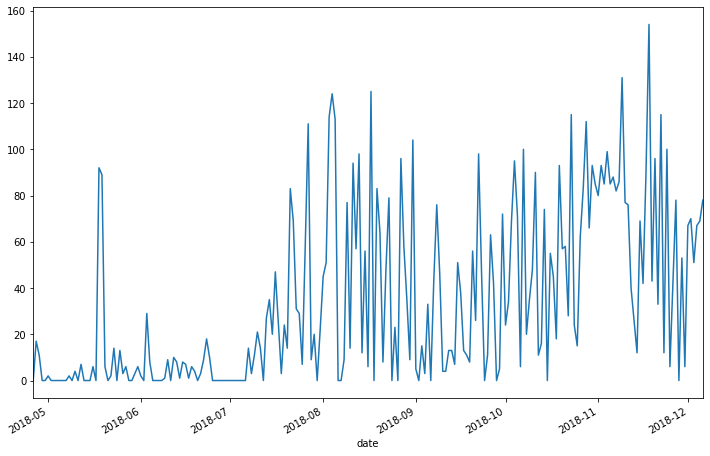

In [47]:
df.peak.plot.line(figsize=(12,8))

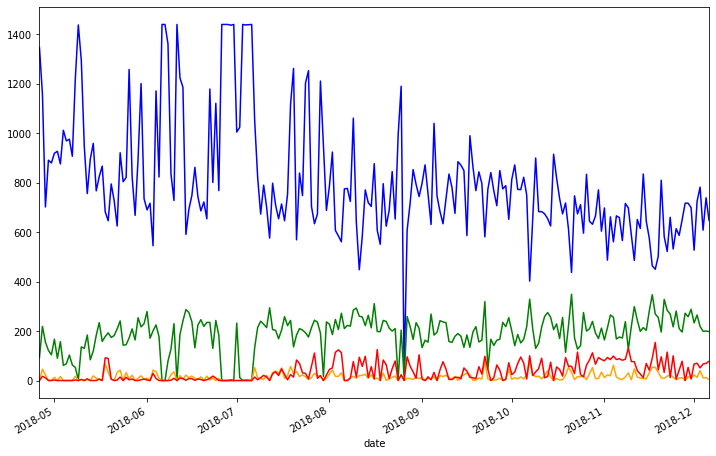

In [51]:
df.out.plot.line(figsize=(12,8), color='blue')
df.fat_burn.plot.line(figsize=(12,8), color='green')
df.cardio.plot.line(figsize=(12,8), color='orange')
df.peak.plot.line(figsize=(12,8), color='red')

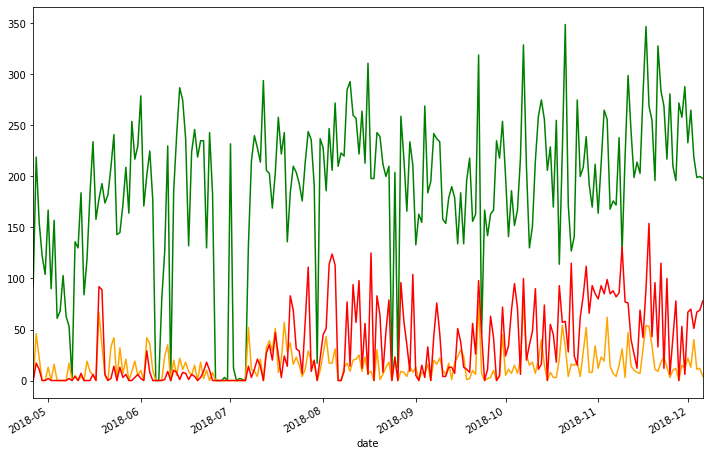

In [52]:
df.fat_burn.plot.line(figsize=(12,8), color='green')
df.cardio.plot.line(figsize=(12,8), color='orange')
df.peak.plot.line(figsize=(12,8), color='red')

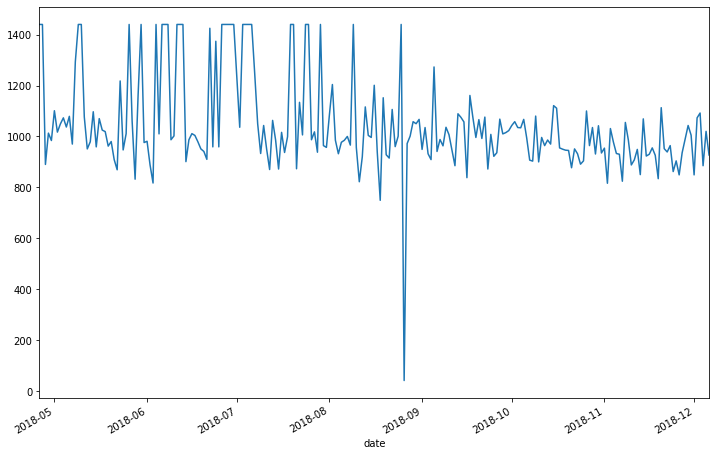

In [53]:
df.time.plot.line(figsize=(12,8))

In [ ]:
df.floors.plot.line(figsize=(12,8))